<a href="https://colab.research.google.com/github/shravankumargulvadi/Assignment-4/blob/master/Assignment_4_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a Vanilla Network


* Number of layers required to ensure that the receptive field at the prediction layer is equal to the image size is incorporated into the network.
* The Network has only one transition layer as accomodating another one would have brought Maxpooling very close to prediction layer.
* At the last convolution layer a larger kernel of size 4x4 is used, As reconvolving with 3x3 on smaller channel sizes leads to uneven focus on pixels, especially the ones at the corner of the channel.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Importing all the required Modules from keras

##Dropout-randomly drops specified proportion of kernels/neurons-helps in overcoming overfitting.
All other modules same as in previous assignment

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from keras.datasets import mnist

## Seeding for Repeatability

In [0]:
seed = 7
np.random.seed(seed)

### Load pre-shuffled MNIST data into train and test sets

## Splitting the data for training and testing

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Printing Size of the image in MNIST and a sample image

(60000, 28, 28)


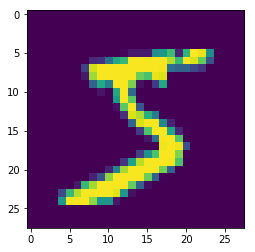

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshaping the MNIST images to 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Setting the 'type' to float32 (Decimel) and Normalizing the pixels by deviding it by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Converting the target values to 1 hot encoding

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Building the main model

In [11]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(16, 3, 3, activation='relu')) #24

model.add(Convolution2D(10, 1, 1, activation='relu')) #24
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(14, 3, 3, activation='relu'))#10

model.add(Convolution2D(16, 3, 3, activation='relu'))#8

model.add(Convolution2D(18, 3, 3, activation='relu'))#6

model.add(Convolution2D(20, 3, 3, activation='relu'))#4

model.add(Convolution2D(10, 4, 4)) #1

model.add(Flatten())
model.add(Activation('softmax'))



Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-pack

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 14)        1274      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2032      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 18)          2610      
__________

## Configuring the model for training
1.Loss- Is a measure of error and is the function which is to be minimized by the optimizer

2.Optimizer- optimizes the result by updating the weights in accordance with the loss

3. Metrics-A metric is a function that is used to judge the performance of the model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


## Creating Checkpoints to save the best weights

In [0]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Model training begins on training data witha each batch containing 32 images and no of epochs is 50

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.2319 - acc: 0.9286 - val_loss: 0.0772 - val_acc: 0.9750

Epoch 00001: val_acc improved from -inf to 0.97500, saving model to weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0749 - acc: 0.9770 - val_loss: 0.0503 - val_acc: 0.9843

Epoch 00002: val_acc improved from 0.97500 to 0.98430, saving model to weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0569 - acc: 0.9829 - val_loss: 0.0536 - val_acc: 0.9824

Epoch 00003: val_acc did not improve from 0.98430
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0475 - acc: 0.9855 - val_loss: 0.0465 - val_acc: 0.9848

Epoch 00004: val_acc improved from 0.98430 to 0.98480, saving model to weights.best.hdf5
Epoch 5/10
60000/60000 [==============================] - 12s 201us/step - l